# Numpy and arrays

In [1]:
import numpy as np

## Create an array
There are plenty of ways to do so depending on what you want. The low-level function is `np.ndarray()` which you probably won't use much. But the [webpage](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) for this function is interesting as it lists all attributes and methods associated with numpy arrays!

In [2]:
# Low-level 
rr = np.ndarray(shape=(2,4,3),dtype=float)
rr

array([[[1.13635099e-322, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 4.44659081e-322]],

       [[1.28822975e-231, 1.28822975e-231, 1.28822975e-231],
        [1.28822975e-231, 7.41098469e-323, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]]])

In [4]:
# From list or tuple
rr = np.array([[3.,4.],[5.,6.]])
print(rr)

[[3. 4.]
 [5. 6.]]


In [5]:
rr1 = np.array([['Claire','Paola'],['Scott','Danny']])  # It doesn't have to be a numerical type  
print(rr1)

[['Claire' 'Paola']
 ['Scott' 'Danny']]


In [6]:
rr2 = np.array([['Claire',10], ['Paola', 6]]) # It doesn't have to be only 1 type
print(rr2)

[['Claire' '10']
 ['Paola' '6']]


In [7]:
# Initialise to 0 or 1.
rr = np.zeros((2,3),dtype=float)
print(rr)
rr1 = np.ones((2,4),dtype=np.int32)
print(rr1)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1 1 1 1]
 [1 1 1 1]]


In [8]:
# Same shape as an existing array. It's possible to choose the data-type with the dtype argument.
rr2 = np.zeros_like(rr1)
rr2

array([[0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [9]:
# Evenly spaced values
rr2= np.arange(5,45,2)
rr2

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43])

In [10]:
# Reshaping an existing array
rr2 = rr2.reshape((5,2,2))
rr2

array([[[ 5,  7],
        [ 9, 11]],

       [[13, 15],
        [17, 19]],

       [[21, 23],
        [25, 27]],

       [[29, 31],
        [33, 35]],

       [[37, 39],
        [41, 43]]])

## Read data from file
Do you remember the csv example from the last training? Here it is with numpy.

In [11]:
li = np.loadtxt('test.txt',delimiter=',',skiprows=2)
print(li)
# For the third format example, simply take the transpose
print(li.T)
# You want the columns in separate arrays?
c1,c2,c3 = np.loadtxt('test.txt', delimiter=',',skiprows=2,unpack=True)
print(c1,c2,c3)

[[50. 30. 40.]
 [70. 20. 30.]]
[[50. 70.]
 [30. 20.]
 [40. 30.]]
[50. 70.] [30. 20.] [40. 30.]


## Indexing
It is the same as for lists etc, except for the multi-dimensional part:

In [12]:
print(f"First element {rr2[0,0]}\n")
print(f"First index of the second dimension \n {rr2[:,0,:]}\n")
print(f"First 2 indexes along the 1st dimension and all other indexes along other dimensions\n {rr2[:2,:,:]}\n")
print(f"Stride {rr2[0:5:2,0,1]}\n")

First element [5 7]

First index of the second dimension 
 [[ 5  7]
 [13 15]
 [21 23]
 [29 31]
 [37 39]]

First 2 indexes along the 1st dimension and all other indexes along other dimensions
 [[[ 5  7]
  [ 9 11]]

 [[13 15]
  [17 19]]]

Stride [ 7 23 39]



There is a generic form to say "all other indexes along all other dimensions", i.e. "everything else", without specifying the number of dimensions in your array. It can be used to indicate all dimensions before or after the specified slice:

In [13]:
print(f"Specify slices in all dimensions: \n{rr2[:2,:,:]}\n")
print(f"Generic form:\n{rr2[:2,...]}\n")
print(f"Any number of dimensions specified before:\n{rr2[:2,0,...]}\n")
print(f"Works for the start of the array as well:\n{rr2[...,0]}\n")

Specify slices in all dimensions: 
[[[ 5  7]
  [ 9 11]]

 [[13 15]
  [17 19]]]

Generic form:
[[[ 5  7]
  [ 9 11]]

 [[13 15]
  [17 19]]]

Any number of dimensions specified before:
[[ 5  7]
 [13 15]]

Works for the start of the array as well:
[[ 5  9]
 [13 17]
 [21 25]
 [29 33]
 [37 41]]



## Matlab users
In Matlab, arrays are matrices. That is not true in Python. This means in Matlab, the multiplication is the matrice multiplication, in Python that's multiplication element by element.
This [page](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users-notes) provides a long table of equivalents between Matlab and Python.

## Operations with arrays along some given axis
Obviously, `numpy` has a lot of handy functions for common operations. For example if you want the mean of an array:

In [14]:
rr2.mean()

24.0

That's handy, what is even more handy is the possibility to calculate the mean over a given dimension only. For example, rr2 is 3D. Let's say the dimensions are time, latitude and longitude respectively and you want to calculate the time average at each spatial point:

In [15]:
rr2.mean(axis=0)  # Remember indexes start at 0

array([[21., 23.],
       [25., 27.]])

### Working with time
There is already a lot out there. You probably won't need to develop much yourself.

Numpy has a date data type: `datetime64`. Do not confuse `datetime64` from Numpy and `datetime` from Python! They do not have the same methods or abilities. Both can be useful.

`datetime64` is relatively simple, it doesn't have a lot of built-in capabilities. When doing fancy date calculations in Python, the must is probably to work with `pandas`. `pandas` is built upon numpy so can readily convert `datetime64` to its own date and time objects. 

Note `xarray` and `pandas` are also very compatible with each other.

In [ ]:
print(np.datetime64('2020-04-15T05:00','ms'))
print(np.datetime64('2020-04-10','M'))

You can do simple calculations. For example, the number of days in February 2036:

In [ ]:
print(np.datetime64('2036-03','D')-np.datetime64('2036-02','D'))

Be careful of the unit:

In [ ]:
print(np.datetime64('2036-03','M')-np.datetime64('2036-02','M'))

It's possible to convert units. So if you want both the number of months and the number of days:

In [ ]:
timeA = np.datetime64('1988-05','M')
timeB = np.datetime64('1990-03','M')
delta = timeB - timeA
print(delta)
deltaD = timeB.astype('datetime64[D]') - timeA.astype('datetime64[D]')
print(deltaD)

Note, `delta` and `deltaD` are not the strings printed out above. They are `numpy.timedelta64` objects. The `print()` function gives a pretty output because of the way the object has been developed.

In [ ]:
deltaD

# Xarray 
Numpy is great but it is very generic. And it only gives you the raw data. The coder has to keep track of the additional information: is there a time dimension? What field does this data represent? etc.

Xarray introduces labelled arrays which typically means you get self-described arrays: name of
the field, name of dimensions, coordinates for the dimensions, etc.

As such it works very well with the netCDF format since this is also a self-describing format.

In [17]:
import xarray as xr

### Reading in netcdf file

In [18]:
# open netcdf file
ds = xr.open_dataset("http://dapds00.nci.org.au/thredds/dodsC/ua8/ARCCSS_Data-10/v1-0/A/A_ACCESS1-0_N48_mon_198001.nc")
# see how all the info is there
ds
# print just a variable to see the variable level attributes.

<xarray.Dataset>
Dimensions:           (lat: 73, lat_1: 72, lon: 96, lon_1: 96, time: 1, z0_hybrid_height: 38, z6_p_level: 16, z_pseudo5: 9)
Coordinates:
  * lat               (lat) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * lat_1             (lat_1) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon               (lon) float32 0.0 3.75 7.5 11.25 ... 348.75 352.5 356.25
  * lon_1             (lon_1) float32 1.875 5.625 9.375 ... 354.375 358.125
  * time              (time) object 1980-01-16 00:00:00
  * z0_hybrid_height  (z0_hybrid_height) float32 20.000338 ... 39254.832
  * z6_p_level        (z6_p_level) float32 2000.0 3000.0 ... 92500.0 100000.0
  * z_pseudo5         (z_pseudo5) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0
Data variables:
    cldh              (time, lat, lon) float32 ...
    cldl              (time, lat, lon) float32 ...
    cldlw             (time, lat, lon) float32 ...
    cldm              (time, lat, lon) float32 ...
    cldvl             (tim

In [21]:
# Variables are stored in the Dataset in a dictionary so you can refer to them by name
rls = ds['rls']
rls

<xarray.DataArray 'rls' (time: 1, lat: 73, lon: 96)>
array([[[-85.04779 , -85.04779 , ..., -85.04779 , -85.04779 ],
        [-85.1753  , -75.705925, ..., -84.32134 , -83.1148  ],
        ...,
        [-33.764465, -34.466923, ..., -33.67685 , -33.510513],
        [-32.67401 , -32.67401 , ..., -32.67401 , -32.67401 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.75 352.5 356.25
  * time     (time) object 1980-01-16 00:00:00
Attributes:
    stash_item:     201
    stash_model:    1
    lookup_source:  defaults (cdunifpp V0.13)
    long_name:      NET DOWN SURFACE LW RAD FLUX
    cell_methods:   time0: mean
    units:          W m-2
    stash_section:  2
    name:           rls
    standard_name:  surface_net_downward_longwave_flux
    _ChunkSizes:    [ 1 73 96]

### Calculations using dimension names
Just like numpy, arrays have common functions as methods. But unlike numpy, you can identify
dimensions by name instead of index position.

Xarray arrays work with most numpy functions. If not, you can access the underlying numpy array.

In [24]:
print('Global mean\n',rls.mean(),'\n')
print('Latitudinal mean\n',rls.mean(dim='lat'))

Global mean
 <xarray.DataArray 'rls' ()>
array(-56.240013, dtype=float32) 

Latitudinal mean
 <xarray.DataArray 'rls' (time: 1, lon: 96)>
array([[-65.07868 , -65.37613 , -64.70618 , -64.39044 , -69.30031 ,
        -70.560196, -65.30518 , -62.82632 , -62.824474, -64.103745,
        -63.9558  , -62.446503, -62.625507, -61.39565 , -58.8266  ,
        -58.844254, -56.64406 , -55.481243, -55.534813, -54.987553,
        -55.266018, -54.82552 , -53.676773, -52.727688, -53.03215 ,
        -53.18777 , -54.2231  , -55.21256 , -52.177402, -53.9782  ,
        -56.048336, -59.35567 , -60.828312, -61.524857, -60.709133,
        -62.44562 , -61.66615 , -61.548393, -62.588665, -63.43029 ,
        -60.082607, -57.584145, -56.094215, -56.11195 , -57.573315,
        -58.06165 , -58.311844, -58.197613, -57.065845, -55.48336 ,
        -53.607853, -51.58004 , -50.634834, -48.001503, -46.791443,
        -46.95243 , -47.360912, -48.252716, -47.9827  , -47.850903,
        -48.558064, -48.894497, -48.93608 , -4

### Selection using coordinate values
Remember how the variables have the dimension names and the coordinate arrays attached to them? This means you can select data using the coordinate names and values rather than indexes.

In [27]:
rls.sel(lat=-85)

<xarray.DataArray 'rls' (time: 1, lon: 96)>
array([[-78.91502 , -79.517914, -79.996216, -80.039185, -80.90219 ,
        -81.13495 , -80.93689 , -80.65609 , -80.43955 , -80.638405,
        -81.093735, -81.89584 , -82.22673 , -82.744354, -82.887184,
        -82.78501 , -81.997765, -82.52604 , -82.51298 , -82.86573 ,
        -82.82742 , -83.66861 , -84.86151 , -85.836525, -87.581665,
        -87.645805, -87.90844 , -88.266174, -88.57524 , -88.93431 ,
        -89.14762 , -89.2583  , -89.356476, -88.979   , -87.7995  ,
        -86.91375 , -86.51828 , -86.273415, -85.849785, -85.1514  ,
        -85.21472 , -85.44402 , -85.11243 , -85.04279 , -85.10057 ,
        -84.07228 , -83.49748 , -83.06319 , -81.94538 , -79.39505 ,
        -78.17306 , -76.915   , -74.91874 , -72.4135  , -71.209785,
        -70.21968 , -69.871605, -69.12709 , -67.774864, -66.29583 ,
        -66.902306, -67.991554, -69.105774, -69.436775, -69.59273 ,
        -69.72863 , -67.937485, -68.58894 , -67.70017 , -67.933105,
    

Xarray can even interpolate for you. You don't have to know the exact values of the points that are in your array. For example you could ask for the nearest points to 100°E in longitude. I would not use this to actually interpolate a whole field! Just use it to save on typing or if you have a projected grid.

In [28]:
rls.sel(lat=-87, method='nearest')

<xarray.DataArray 'rls' (time: 1, lon: 96)>
array([[-85.1753  , -75.705925, -75.94986 , -80.552826, -82.46028 ,
        -83.114174, -83.22234 , -83.14253 , -83.41487 , -83.34453 ,
        -83.244736, -83.19713 , -83.39504 , -83.62289 , -83.910225,
        -83.77617 , -83.6847  , -83.4808  , -83.4019  , -83.3896  ,
        -83.61194 , -83.97876 , -84.68072 , -85.53507 , -86.59625 ,
        -87.021904, -87.56501 , -87.9751  , -88.32728 , -88.5918  ,
        -88.725494, -88.89019 , -88.90684 , -88.9487  , -88.70379 ,
        -88.60293 , -88.26766 , -88.079956, -88.03719 , -87.99103 ,
        -87.724075, -87.82143 , -87.835884, -87.89696 , -87.73516 ,
        -87.95004 , -87.9729  , -88.169525, -88.6229  , -88.892624,
        -89.21364 , -89.640625, -89.868416, -90.09483 , -90.25166 ,
        -90.37407 , -90.3296  , -90.12337 , -89.74752 , -89.34052 ,
        -88.93714 , -88.44242 , -87.82386 , -87.15236 , -86.27502 ,
        -85.175995, -84.16521 , -83.23818 , -82.44144 , -82.33053 ,
    

### Quick plotting
It is very easy to do a quick plot of your data. It isn't a plot ready for publication but it can easily allow you to visualise your fields. And the nice touch is Xarray will automatically use the meta-data to add labelling to the plot.

Before plotting with matplotlib in Jupyter Notebook, you need to add a special line so the plots appear in the notebook. This only to be done once per notebook, not for each plot.

In [30]:
%matplotlib inline

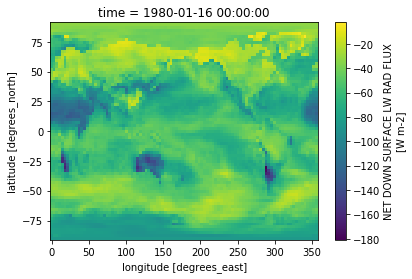

In [31]:
rls.plot()

Note we haven't loaded matplotlib, but because xarray uses it, it loads it for us.

### Save data to file
There is a very simple way to save data back to a netcdf file. It isn't necessarily the fastest way. But you should only have to write out some analysed fields using Python which means relatively small amounts of data.

Note, netcdf support inline compression so you should ALWAYS save your data compressed. Inline compression means the file just looks the same, access is the same, you don't need to uncompress before being able to see the information from the file.

In [33]:
# Compression
encod={}
for var in ds.data_vars:   # data_vars stores the names of the variables in a dataset, as strings
    encod[var]={'zlib':True}

# Write to file
ds.to_netcdf('test.nc',encoding=encod)

### More info
This was a very very quick presentation of `xarray`. We were simply trying to give you the very basics, especially highlights the philosophy of the package. We will run a `xarray` training soon. In the meantime if you want to know more, you can always run through [xarray quick overview](http://xarray.pydata.org/en/stable/quick-overview.html)